# Task 1: Introduction

This Project Is Derived From One Of Coursera Guided Projects Which I Completed With Verification Link Below 

https://www.coursera.org/account/accomplishments/verify/91L3DAOIB9FP

We Are Here Producing Artificial Data With Added Noise To Simulat Real World Problems

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [2]:
def generate_examples(num=1000):
    w=[1.0,-3.0]
    b=1.0
    w=np.reshape(w,(2,1))
    x=np.random.randn(num,2)
    y=np.dot(x,w)+1
    y=np.reshape(y,(num,1))+np.random.randn() #adding some noise to simulate real life problems 
    return x,y

In [3]:
x,y=generate_examples()

In [4]:
print(x.shape,y.shape)

(1000, 2) (1000, 1)


In [5]:
print(x[0],y[0])

[-2.10069072  1.56950551] [-5.10616194]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [6]:
class Model():
    def __init__(self,num_features):
        self.num_features=num_features
        self.w=np.random.randn(num_features,1)
        self.b=np.random.randn()

In [7]:
model=Model(2)
print(model.w)
print(model.b)

[[-0.88880842]
 [ 0.18862853]]
0.29783163555318837


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [8]:
class Model(Model):
    def forward_pass(self,x):
        y_hat=self.b+np.dot(x,self.w)
        return y_hat

In [9]:
y_hat=Model(2).forward_pass(x)
print(y_hat.shape,y[0])

(1000, 1) [-5.10616194]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [10]:
class Model(Model):
    def compute_loss(self,y_hat,y_true):
        return (np.sum(np.square(y_true-y_hat))/(2*y_true.shape[0]))

In [11]:
model=Model(2)
pre=model.forward_pass(x)
loss=model.compute_loss(pre,y)

In [12]:
loss

6.725451069349988

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [13]:
class Model(Model):
    def backward_pass(self,x,y_hat,y_true):
        m=y_true.shape[0]
        db=(1/m)*(np.sum(y_hat-y_true))
        dw=(1/m)*(np.sum(np.dot(np.transpose(y_hat-y_true),x),axis=0))
        return dw,db

In [14]:
x,y=generate_examples()

model = Model(2)
y_hat = model.forward_pass(x)

dw,db = model.backward_pass(x,y_hat,y)

In [15]:
dw,db

(array([-1.4009566 ,  2.01701942]), -2.6294811752275957)

# Task 7: Update Parameters

In [16]:
class Model(Model):
    def update_params(self,dw,db,alpha):
        self.w=self.w-alpha*np.reshape(dw,(self.num_features,1))
        self.b=self.b-db

# Task 8: Training Loop

In [17]:
class Model(Model):
    def train(self,x_train,y_train,alpha,iters):
        losses=list()
        for i in range(iters):
            y_hat=self.forward_pass(x_train)
            loss=self.compute_loss(y_hat,y_train)
            dw,db=self.backward_pass(x_train,y_hat,y_train)
            self.update_params(dw,db,alpha)
            losses.append(loss)
            if i%int(iters/10)==0:
                print(f'for iteration {i} the loss is {loss:.4f}')
        return losses
            

In [18]:
model=Model(2)

In [19]:
x_train,y_train=generate_examples()

In [20]:
losses=model.train(x_train,y_train, 3e-3 ,1000)

for iteration 0 the loss is 8.5103
for iteration 100 the loss is 4.4493
for iteration 200 the loss is 2.4013
for iteration 300 the loss is 1.2960
for iteration 400 the loss is 0.6995
for iteration 500 the loss is 0.3776
for iteration 600 the loss is 0.2038
for iteration 700 the loss is 0.1100
for iteration 800 the loss is 0.0594
for iteration 900 the loss is 0.0321


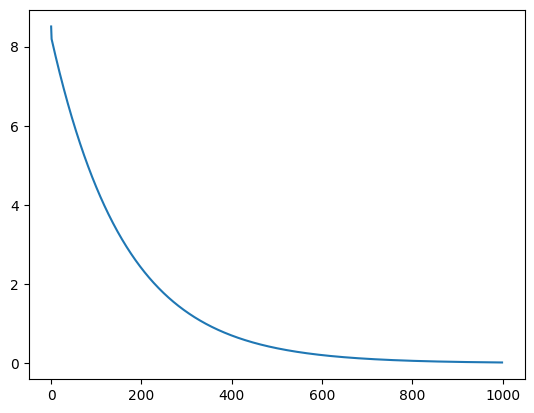

In [21]:
plt.plot(losses)

# Task 9: Predictions

In [22]:
model_untrained=Model(2)

x_test,y_test=generate_examples(500)

print(x_test.shape,y_test.shape)

(500, 2) (500, 1)


In [23]:
predictions_untrained=model_untrained.forward_pass(x_test)
predictions_trained=model.forward_pass(x_test)

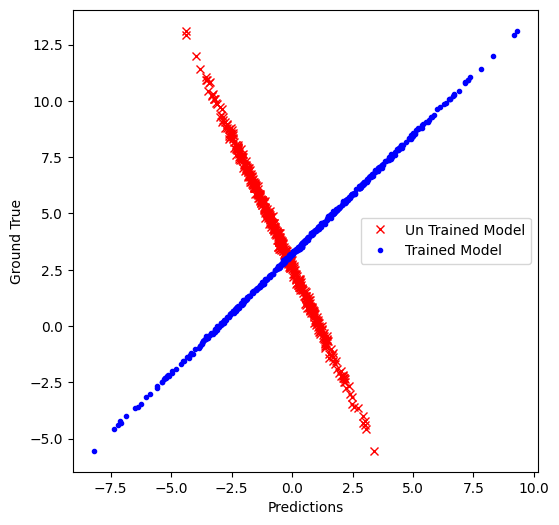

In [24]:
plt.figure(figsize=(6,6))
plt.plot(predictions_untrained,y_test,'rx',label='Un Trained Model')
plt.plot(predictions_trained,y_test,'b.',label='Trained Model')
plt.xlabel('Predictions')
plt.ylabel('Ground True')
plt.legend()
plt.show()